<a href="https://colab.research.google.com/github/Bettykerui/Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/network_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
!pip install pandas matplotlib nltk
import pandas as pd


In [15]:

import pandas as pd

# Use the file name directly if it's in the root directory
file_name = 'Mental-Health-Twitter.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(df.head())




   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837         0      1  
1     

In [17]:
# datacleaning
df = df.fillna('0')
df = df.drop_duplicates()


In [19]:
import re
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already downloaded)
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['post_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  \
0      211         251       837         0      1   
1   

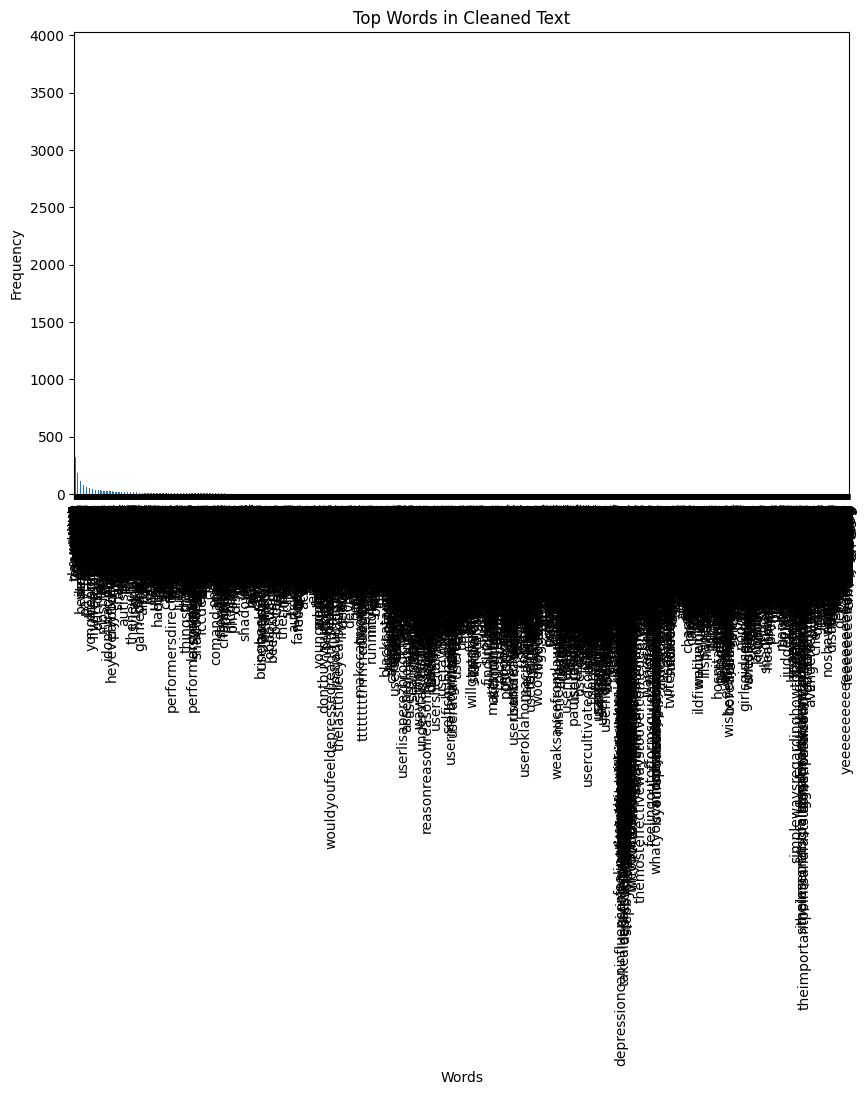

In [20]:
# Explore the cleaned data
print(df.head())

# Visualize some aspects of the data
# (e.g., frequency distribution of cleaned words)
import matplotlib.pyplot as plt

word_freq = df['cleaned_text'].str.split(expand=True).stack().value_counts()
word_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Cleaned Text')
plt.show()